In [81]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import torch
import glob
import pandas as pd

In [112]:
# input : 이미촬영 -> 공유문서에 있는 이미지 가져온것
# =============================================================================================
# <파일 트랙킹 코드>
# 라즈베리파이 카메라로 사진을 획득한 과정이라고 생각
img = Image.open('../data/normal_data/real_data_normal/20200518_take1.jpg')
# plt.imshow(img_final)
# plt.show()

# =============================================================================================
# output : 이미지


img_color = np.array(img)
img = np.array(img.convert('L'))

img_color_ROI = img_color[733:1437,710:1414]
img_ROI = img[733:1437,710:1414]

In [123]:
# 데이터 이진화
_, src_bin = cv2.threshold(img_ROI, 180, 255, cv2.THRESH_BINARY)
src_bin = cv2.bitwise_not(src_bin)

# 데이터 처리
img_list = list()
nlabels, labels, stats, centroids = cv2.connectedComponentsWithStats(src_bin)
dst = cv2.cvtColor(img_ROI, cv2.COLOR_GRAY2BGR)
alpha = 3
SIZE = 64

stats


# df = pd.DataFrame(stats)
# df_sorted = df.sort_values(by = [1,0])
# stats_sorted = np.array(df_sorted)
# stats = stats_sorted
# df_sorted

array([[     0,      0,    704,    704, 325614],
       [     0,      0,     59,     67,   1856],
       [    70,     16,     49,     41,   1434],
       [   135,     16,     43,     38,   1201],
       [   654,     17,     44,     44,   1420],
       [   201,     19,     45,     40,   1306],
       [   460,     21,     47,     45,   1555],
       [   592,     20,     38,     43,   1312],
       [   331,     23,     47,     43,   1405],
       [   394,     23,     45,     44,   1380],
       [   443,     23,      3,      1,      3],
       [   268,     25,     46,     42,   1474],
       [   528,     24,     41,     38,   1139],
       [     0,     69,      2,    265,    359],
       [    14,     69,     11,      1,     11],
       [    28,     69,     23,      1,     23],
       [   666,     74,     31,      1,     31],
       [   698,     74,      6,      1,      6],
       [   390,     77,     56,     51,   1826],
       [     5,     78,     47,     45,   1589],
       [    71,     

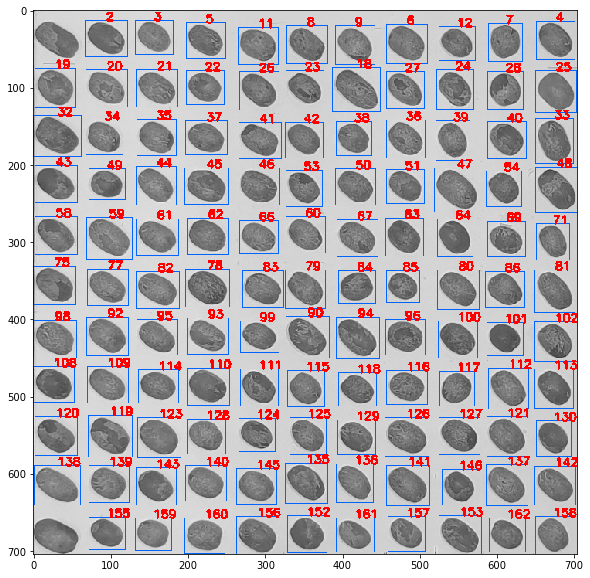

In [124]:
for img_num in range(1,nlabels):
    stat = stats[img_num]
    x = stat[0] - alpha
    y = stat[1] - alpha
    width = stat[2] + 2*alpha
    height = stat[3] + 2*alpha
    n_pixel = stat[4]

    
    # 최대 픽셀 지정해서 임계값보다 크면 패스해버리기
    if n_pixel < 500 or width > 64 or height > 64 : continue
    
    cv2.rectangle(dst, (x, y), (x+width, y+height), (0,100,255))
    
    # 사각박스에 레이블 달아주기
    text = str(img_num)
    cv2.putText(dst, text=text, org=(x+int(width/2), y), fontFace=cv2.FONT_HERSHEY_SIMPLEX, fontScale=0.5, color=(255, 0, 0), thickness=2)
    
    
    delta_x = int((SIZE - width) / 2)
    delta_y = int((SIZE - height) / 2)
    
    tmp1 = img_color_ROI[y : y+height, x : x+width, :].copy()
    tmp2 = np.zeros((64,64,3), dtype = int)
    
    # print(stat) # 가장자리쪽에 있는 생두들은 ROI를 벗어나는것들이 있다.
    try:
        for channel in range(3):
            tmp2[delta_y : delta_y + height, delta_x : delta_x + width , i] = tmp1[0:height, 0:width, channel]
        tmp2 = np.uint8(tmp2)
    except:
        pass
    
    img_list.append((img_num,stat,tmp2))
    # return img_list, dst
plt.figure(figsize = (10,10))
plt.imshow(dst)

In [125]:
# img_list
for img_num in range(len(img_list)):
    print(img_list[img_num][0], img_list[img_num][1])

2 [  70   16   49   41 1434]
3 [ 135   16   43   38 1201]
4 [ 654   17   44   44 1420]
5 [ 201   19   45   40 1306]
6 [ 460   21   47   45 1555]
7 [ 592   20   38   43 1312]
8 [ 331   23   47   43 1405]
9 [ 394   23   45   44 1380]
11 [ 268   25   46   42 1474]
12 [ 528   24   41   38 1139]
18 [ 390   77   56   51 1826]
19 [   5   78   47   45 1589]
20 [  71   80   48   42 1430]
21 [ 136   80   48   42 1435]
22 [ 201   81   43   38 1222]
23 [ 330   81   43   41 1218]
24 [ 525   80   42   45 1365]
25 [ 653   81   47   48 1644]
26 [ 270   82   45   44 1395]
27 [ 460   82   43   42 1319]
28 [ 591   82   40   43 1340]
32 [   3  139   56   47 1857]
33 [ 653  143   43   52 1653]
34 [  71  145   42   39 1268]
35 [ 137  144   45   41 1376]
36 [ 460  145   44   43 1370]
37 [ 200  146   48   38 1350]
38 [ 395  147   40   38 1176]
39 [ 524  146   38   45 1267]
40 [ 591  147   44   42 1356]
41 [ 269  148   49   41 1431]
42 [ 329  148   43   40 1227]
43 [   5  204   49   42 1427]
44 [ 136  205   46

In [ ]:
# 라즈베리파이 이미지 -> 64 x 64 이미지를 리스트에 저장
# img_list = multi_objectDetection(img)[0]
# fig = plt.figure(figsize = (10,10))
# plt.imshow(multi_objectDetection(img)[1])
# plt.show()
# # print(np.uint8(img_list[0]))


In [126]:
def imgPreprocessing(src, thres):
    ############################################################################
    # <이미지 노이즈 및 배경 제거>

    # 그레이 스케일로 변환
    gray = cv2.cvtColor(src, cv2.COLOR_RGB2GRAY)
    
    # 바이너리로 변환
    ret, binary = cv2.threshold(gray,thres,255, cv2.THRESH_BINARY)
    binary = cv2.bitwise_not(binary)

    # 바이너리 이미지와 원본 이미지의 데이터가 일치하는 부분 만 다시 추출히기
    tmp = np.zeros_like(src)
    for y in range(64):
        for x in range(64):
            if (binary != 0)[y,x]:
                for i in range(3):
                    tmp[y,x,i] = src[y,x,i]
    
    src_processed = tmp   

    # 이미지 크기 정의
    height = src_processed.shape[0]
    width = src_processed.shape[1]

    ############################################################################
    # <생두 무게 중심 구하기>
    R = list()
    for y in range(height):
        for x in range(width):
            if binary[y,x]:            
                R.append([y, x])

    # 질량의 합
    M = len(R)

    R = np.array(R)
    R_x = R[:,1]
    R_y = R[:,0]

    R_x_sum = R_x.sum()
    R_y_sum = R_y.sum()

    center = np.round(R_x_sum/M) , (np.round(R_y_sum/M))

    height_center = center[0]
    width_center = center[1]

    # print('center:', height_center, width_center)

 
    ############################################################################
    # <객체 외부의 노이즈 데이터 처리하기>

    # 바이너리의 윤곽선 추출
    _, contours, hierachy = cv2.findContours(binary, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_NONE)    

    # 생두 객체 윤곽과 윤곽벡터 구하기
    contours_leng = [len(i) for i in contours if len(i) != 252]
    len_max = np.array(contours_leng).max()
    contour_vector = list()
    
    for i in contours:
        if len(i) == len_max:
            for point in i:
                contour_vector.append((point[0][1]-height_center, point[0][0]-width_center))
            
            # 윤곽 벡터 사이즈와 최대 사이즈 구하기
            vector_size = np.sqrt(np.array(contour_vector)[:,0]**2 + np.array(contour_vector)[:,1]**2 )
            max_size = vector_size.max()
    

    # 질량 벡터와 윤곽벡터를 비교하는 코드 짜기
    R_size = np.sqrt((R[:,1] - width_center) ** 2 + (R[:,0] - height_center) ** 2)
    R_total = np.hstack([R,R_size.reshape((R_size.shape[0],1))])

    # max_size 보다 큰 R 좌표들만 추출하기
    R_filtered = R_total[R_total[:,2] > max_size]


    # R_filtered의 좌표를 이용해서 노이즈 처리
    for i in R_filtered[:,:2]:
        src_processed[int(i[1]),int(i[0])] = 0

    ############################################################################
    # <이미지의 중심과 생두의 무게중심 일치시키기>
    
    # 1. 이미지 센터 좌표를 구한다 
    src_center = np.array([src_processed.shape[1] / 2, src_processed.shape[0] / 2])

    # 2. 객체의 중심을 구한다
    object_center = np.array([height_center, width_center])

    # 3. 이미지 중심과 객체의 중심의 차이를 구한다
    delta = object_center - src_center

    # 4. 이미지 이동
    height, width = src_processed.shape[:2]
    M = np.float32([[1, 0, -delta[0]], [0, 1, -delta[1]]]) # 이미지를 width 방향으로 delta[0]만큼 , hiehgt 방향으로 -delta[1]만큼
    img_translation = cv2.warpAffine(src_processed, M, (width,height))

    return src, binary, src_processed, img_translation
img_processed = imgPreprocessing(img_list[0], 170)[3]

Image.fromarray(img_processed).save('../Final_data/normal_1st_pcd_' + str(1) + '.jpg')
plt.imshow(img_processed)
plt.show()



TypeError: src is not a numerical tuple